In [1]:
# let's import all neccessary libraries
import pandas as pd
import numpy as np 


In [2]:
Order_details = pd.read_csv('/Users/hemraj/Pizza sales /pizza_sales/order_details.csv')
Orders = pd.read_csv('/Users/hemraj/Pizza sales /pizza_sales/orders.csv')
Pizza_types = pd.read_csv('/Users/hemraj/Pizza sales /pizza_types.csv', encoding='latin1')
Pizza = pd.read_csv('/Users/hemraj/Pizza sales /pizza_sales/pizzas.csv')


In [3]:
Order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
Orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
Pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
Pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


### **Merge all files to single edf for analysis**

In [8]:
# Merge order_details with pizzas
df = pd.merge(Order_details, Pizza, on='pizza_id')

# Check
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00


In [9]:
# Merge with pizza types
df = pd.merge(df, Pizza_types, on='pizza_type_id')

# Check
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [10]:
# Merge with orders
df = pd.merge(df, Orders, on='order_id')

# Check
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


### **Key Performance Indicators (KPIs)**

**Total Revenue**: Overall earnings from pizza sales.

In [13]:
# create a new column to store the value 
df['total_price'] = df['quantity'] * df['price']

# create a variable to store the sum of the total price
total_revenue = df['total_price'].sum()

# print the output using print f 
print(f"The overall earning from the sale of pizza : ${total_revenue:.2f}")

The overall earning from the sale of pizza : $817860.05


**Average Order Value**: Insights into customer spending per order.

In [15]:
# use the previously created total_price column store it's sum in a new variable
total_price = df['total_price'].sum()

# count the total order id and store in a new variable 
total_orders = df['order_id'].count()

# divide the total price by total orders to get agerage spending of custumer per order
avg_spen = total_price / total_orders

# print the output
print(f"Average order value : ${avg_spen:.2f}")

Average order value : $16.82


**Total Pizzas Sold**: The total number of pizzas purchased.

In [17]:
# just count the quantity sold which will give us the pizzas purchased.
total_pizzas_sold = df['quantity'].sum()

# print the output
print(f"Total Pizzas sold : {total_pizzas_sold}")


Total Pizzas sold : 49574


**Total Orders**: The number of orders placed.

In [19]:
# count all the order id to get the total orders placed
total_orders = df['order_id'].count()

# print the output 
print(f"Total_orders : {total_orders}")

Total_orders : 48620


**Average Pizzas Per Order** : Understanding order sizes and customer preferences.

In [21]:
# Sum the order quantity and store in new variable
total_quantity = df['quantity'].sum()

# Count the no of orders placed and store in new variable
Orders = df['order_id'].count()

# divide the total quantity by the no of orders placed
avg_orders = total_quantity / Orders 

# print the output 
print(f"Average pizzas per order : {avg_orders:.2f}")

Average pizzas per order : 1.02


## Charts and Visualizations



In [23]:
# load the matplotlib library for visualization
import matplotlib.pyplot as plt 

 **Orders by Day**: Identifying peak ordering days.

In [25]:
# Group by 'date' and count unique order IDs
orders_by_day = df.groupby('date')['order_id'].nunique()

# Sort to find peak ordering days
peak_days = orders_by_day.sort_values(ascending=False)

# Display top 5 peak ordering days
print("Top 5 Peak Ordering Days:")
print(peak_days.head())

Top 5 Peak Ordering Days:
date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
Name: order_id, dtype: int64


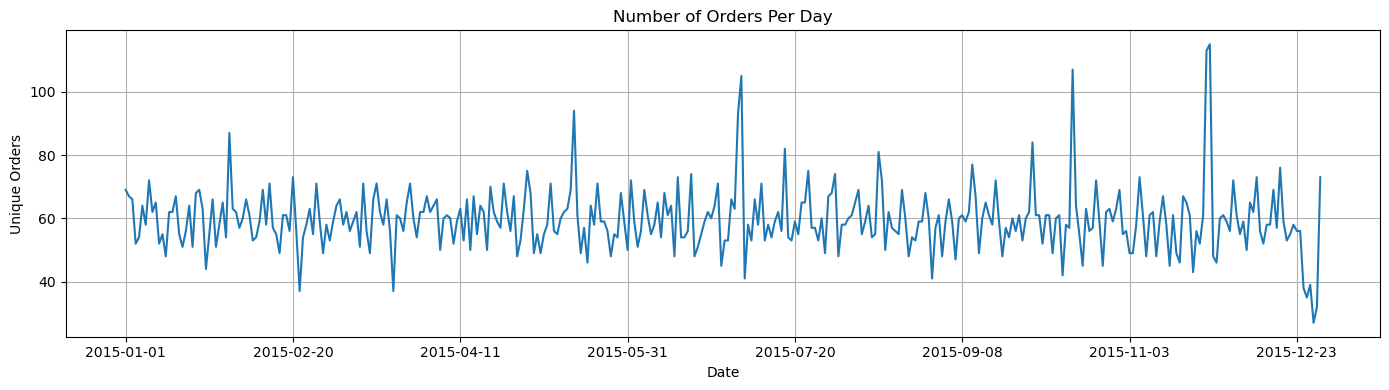

In [51]:
# Create new figure canvas for the plot.
plt.figure(figsize=(14,4))

# use the orders by day data for visualization
orders_by_day.plot()

# set the title of the plot 
plt.title("Number of Orders Per Day")

# assign lables for x axis and y axis
plt.xlabel("Date")
plt.ylabel("Unique Orders")


plt.grid(True)
plt.tight_layout()
plt.show()

**Orders by Month**: Analyzing seasonal sales trends.

In [28]:
# Convert the date column to datetime format.
df['date'] = pd.to_datetime(df['date'])

# Print the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  date              48620 non-null  datetime64[ns]
 11  time              48620 non-null  object        
 12  total_price       48620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [29]:
# create a new column to store the year
df['year'] = df['date'].dt.year

# Create a new column to store the months
df['month'] = df['date'].dt.month

# change the month number to the full month name
df['month_name'] = df['date'].dt.strftime('%B')  

In [30]:
df['month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [53]:
monthly_orders = df.groupby('month_name')['order_id'].nunique().reset_index()
monthly_orders

,month_name,order_id
0,April,1799
1,August,1841
2,December,1680
3,February,1685
4,January,1845
5,July,1935
6,June,1773
7,March,1840
8,May,1853
9,November,1792


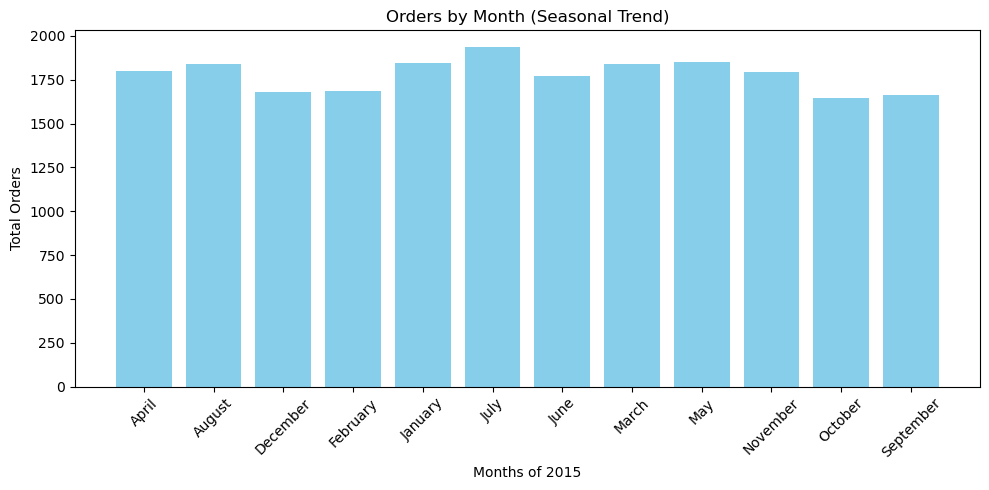

In [59]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_orders['month_name'], monthly_orders['order_id'], color='skyblue')
plt.title('Orders by Month (Seasonal Trend)')
plt.xlabel('Months of 2015')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Sales Percentage by Pizza Category**: Comparing different pizza categories.

In [61]:
# Group by Category and count the total quantity.
category_sales = df.groupby('category')['quantity'].sum().reset_index()

# print the categroy sales 
category_sales

,category,quantity
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


In [63]:
# Calculate the categorical sale percentage of pizza
total_sales = category_sales['quantity'].sum()
category_sales['sales_percentage'] = (category_sales['quantity'] / total_sales) * 100

# print the category sales table
category_sales

,category,quantity,sales_percentage
0,Chicken,11050,22.289910
1,Classic,14888,30.031872
2,Supreme,11987,24.180014
3,Veggie,11649,23.498205


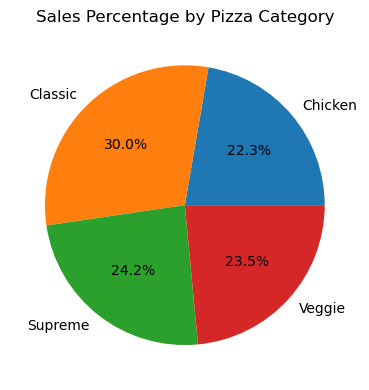

In [152]:
plt.figure(figsize=(5, 4))
plt.pie(category_sales['sales_percentage'], labels=category_sales['category'], autopct='%1.1f%%')
plt.title('Sales Percentage by Pizza Category')
plt.tight_layout()
plt.show()

**Sales Percentage by Pizza Size**: Evaluating the popularity of various sizes.

In [117]:
# Group  the data by the size of the pizza 
Category = df.groupby('size')['price'].sum().reset_index()

# Calculate Percentage of Total Sales
Category['percentage'] = (Category['price'] / Category['price'].sum()) * 100

# Check
Category

,size,price,percentage
0,L,366862.1,45.746558
1,M,245409.5,30.601798
2,S,174794.5,21.796328
3,XL,13872.0,1.729795
4,XXL,1006.6,0.125520


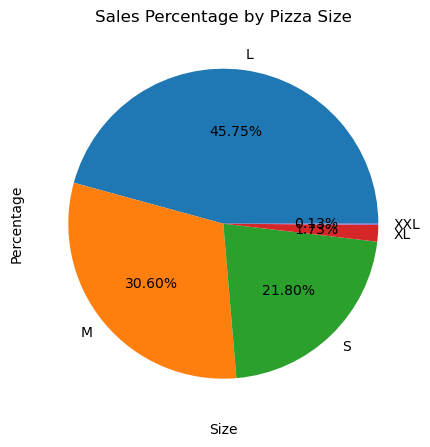

In [158]:
plt.figure(figsize=(5,7))
plt.pie(
    Category['percentage'],labels=Category['size'], autopct='%1.2f%%'
)
plt.title('Sales Percentage by Pizza Size')
plt.xlabel('Size')
plt.ylabel('Percentage')
plt.show()

**Top 5 Pizzas by Revenue**: Identifying the highest-grossing pizzas.

In [67]:
# Calculate the total revenue by multiplying the quantity and pizza id
df['revenue']= df['quantity']* df['total_price']

# Group by pizza id and total revenue 
total_revenue = df.groupby('pizza_id')['revenue'].sum().reset_index()

# Sort the value descending as per the revenue
top_5_pizzas_revenue = total_revenue.sort_values(by='revenue', ascending=False).head(5)

# show 
top_5_pizzas_revenue

,pizza_id,revenue
80,thai_ckn_l,31166.50
20,five_cheese_l,27953.50
3,big_meat_s,25680.00
21,four_cheese_l,25165.90
68,spicy_ital_l,23924.75


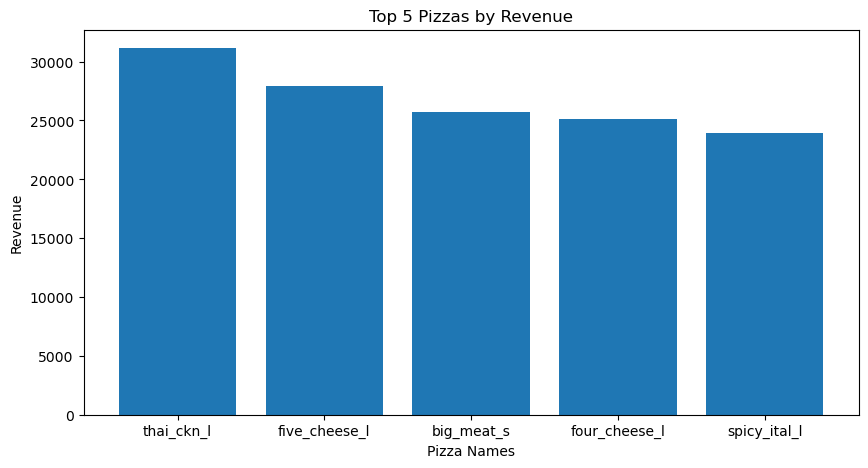

In [91]:
plt.figure(figsize=(10,5))
plt.bar(top_5_pizzas_revenue['pizza_id'], top_5_pizzas_revenue['revenue'])
plt.title('Top 5 Pizzas by Revenue')
plt.xlabel('Pizza Names')
plt.ylabel('Revenue')
plt.show()

**Top 5 Pizzas by Orders**: Understanding the most frequently ordered pizzas.

In [81]:
# Group by pizza id and total quantity
top_pizzas = df.groupby('pizza_id') ['quantity'].sum().reset_index()

# Sort the value descending to get the top 5 highest orders
top_5_pizzas = top_pizzas.sort_values(by='quantity' , ascending = False).head(5)

# Check 
top_5_pizzas

,pizza_id,quantity
3,big_meat_s,1914
80,thai_ckn_l,1410
20,five_cheese_l,1409
21,four_cheese_l,1316
18,classic_dlx_m,1181


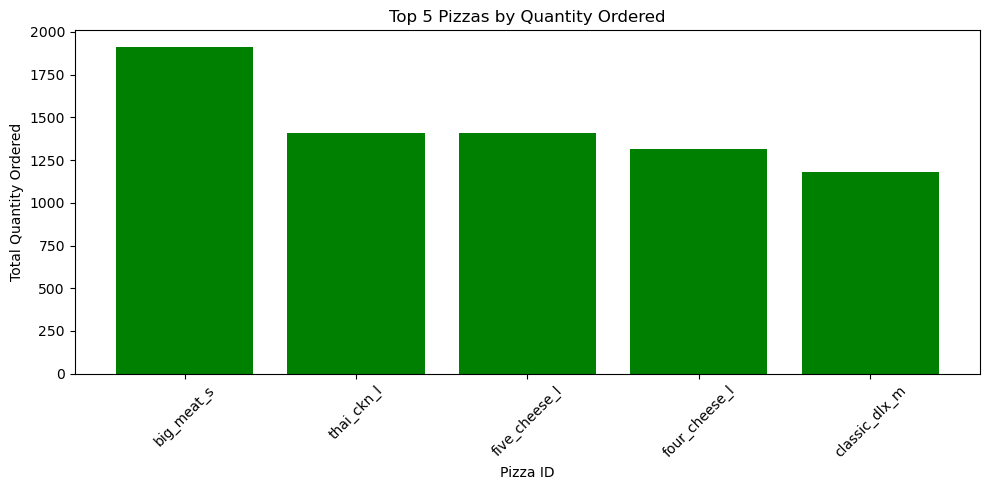

In [144]:

plt.figure(figsize=(10, 5))
plt.bar(top_5_pizzas['pizza_id'], top_5_pizzas['quantity'], color = 'Green')
plt.title('Top 5 Pizzas by Quantity Ordered')
plt.xlabel('Pizza ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()